In [1]:
import scipy
import numpy as np
import gensim
import re
import pandas as pd
from sklearn import feature_extraction
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sophiekamuf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_pickle("df_cleaned.pkl")

In [4]:
df.head()

,Article,Title,Paragraphs,References_internal_clean,Paragraphs_cleaned
1,Article 1,Scope,This Regulation lays down uniform rules concer...,[460],This Regulation lays down uniform rules concer...
2,Article 2,Supervisory powers,For the purposes of ensuring compliance with t...,[],For the purposes of ensuring compliance with t...
3,Article 3,Application of stricter requirements by instit...,This Regulation shall not prevent institutions...,[],This Regulation shall not prevent institutions...
4,Article 4,Definitions,"1. For the purposes of this Regulation, the ...","[4, 2, 115, 25, 71, 301, 113, 1]","1. For the purposes of this Regulation, the ..."
5,Article 5,Definitions specific to capital requirements f...,"For the purposes of Part Three, Title II, the ...",[],"For the purposes of Part Three, Title II, the ..."


In [51]:
paragraphs = df['Paragraphs_cleaned'].tolist()

In [56]:
paragraphs

['This Regulation lays down uniform rules concerning general prudential requirements that institutions supervised under Directive 2013/36/EU shall comply with in relation to the following items: (a) own funds requirements relating to entirely quantifiable, uniform and standardised elements of credit risk, market risk, operational risk and settlement risk; (b) requirements limiting large exposures; (c) after the delegated act referred to in  has entered into force, liquidity requirements relating to entirely quantifiable, uniform and standardised elements of liquidity risk; (d) reporting requirements related to points (a), (b) and (c) and to leverage; (e) public disclosure requirements. This Regulation does not govern publication requirements for competent authorities in the field of prudential regulation and supervision of institutions as set out in Directive 2013/36/EU. ',
 'For the purposes of ensuring compliance with this Regulation, competent authorities shall have the powers and s

In [6]:
tokenizer = RegexpTokenizer(r'\w+')

In [7]:
p_stemmer = PorterStemmer()

In [57]:
texts = []

In [58]:
for i in paragraphs:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopwords]
    
    # stem tokens
    #stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stopped_tokens)

In [14]:
import itertools

In [59]:
#flattens lists
merged = list(itertools.chain(*texts))

In [11]:
def lexical_diversity(text):
    return len(text)/len(set(text))

In [17]:
lexical_diversity(merged)

41.57739557739558

In [20]:
#2442 unique words
len(set(merged))

2442

In [18]:
#101532 words
len(merged)

101532

In [21]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
text = ' '.join(str(e) for e in merged)

In [61]:
text

'regulation lays uniform rules concerning general prudential requirements institutions supervised directive 2013 36 eu shall comply relation following items funds requirements relating entirely quantifiable uniform standardised elements credit risk market risk operational risk settlement risk b requirements limiting large exposures c delegated act referred entered force liquidity requirements relating entirely quantifiable uniform standardised elements liquidity risk reporting requirements related points b c leverage e public disclosure requirements regulation govern publication requirements competent authorities field prudential regulation supervision institutions set directive 2013 36 eu purposes ensuring compliance regulation competent authorities shall powers shall follow procedures set directive 2013 36 eu regulation shall prevent institutions holding funds components excess applying measures stricter required regulation 1 purposes regulation following definitions shall apply 1 cr

In [62]:
cv = CountVectorizer(min_df=0, stop_words="english", max_features=200)
counts = cv.fit_transform([text]).toarray().ravel()                                                  
words = np.array(cv.get_feature_names()) 
# normalize                                                                                                                                             
counts = counts / float(counts.max())

In [38]:
from PIL import *
from PIL import Image, ImageDraw, ImageFont

In [39]:
width = 5
height = 4

img_grey = Image.new("L", (width, height))
draw = ImageDraw.Draw(img_grey)

In [43]:
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS
file = text

In [63]:
with open("crr_text2.txt", "w") as output:
    output.write(str(text))

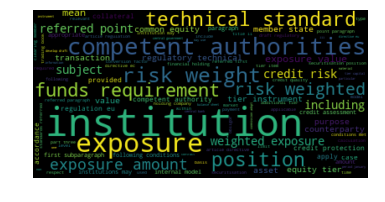

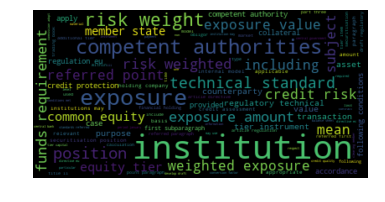

In [64]:
from os import path
from wordcloud import WordCloud

d = path.dirname('crr_text2.txt')

# Read the whole text.
text = open(path.join(d, 'crr_text2.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

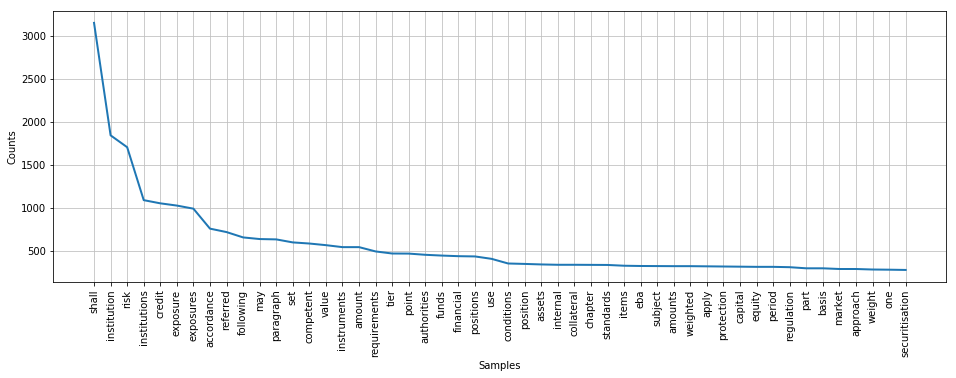

In [71]:
# get all words for government corpus
long_words = [wrd for wrd in merged if len(wrd) >= 3]
freqdist = nltk.FreqDist(long_words)
plt.figure(figsize=(16,5))
freqdist.plot(50)
plt.savefig('50_most_commonwords.png')

In [11]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

In [12]:
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [13]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=100, id2word = dictionary, passes=20)

In [14]:
print(ldamodel)

LdaModel(num_terms=2442, num_topics=100, decay=0.5, chunksize=2000)


In [15]:
ldamodel.print_topics(10)

[(29,
  '0.062*"asset" + 0.056*"liquid" + 0.033*"high" + 0.025*"bank" + 0.020*"definit" + 0.019*"report" + 0.019*"credit" + 0.015*"c" + 0.014*"oper" + 0.014*"refer"'),
 (18,
  '0.110*"risk" + 0.080*"instrument" + 0.064*"debt" + 0.048*"posit" + 0.040*"shall" + 0.033*"requir" + 0.031*"payment" + 0.030*"fund" + 0.027*"underli" + 0.026*"calcul"'),
 (89,
  '0.090*"sheet" + 0.089*"balanc" + 0.062*"item" + 0.046*"valu" + 0.042*"annex" + 0.042*"exposur" + 0.041*"determin" + 0.030*"credit" + 0.029*"accord" + 0.028*"list"'),
 (64,
  '0.044*"exposur" + 0.034*"client" + 0.025*"shall" + 0.025*"institut" + 0.021*"calcul" + 0.017*"transact" + 0.014*"refer" + 0.012*"follow" + 0.011*"part" + 0.011*"titl"'),
 (35,
  '0.082*"requir" + 0.058*"fund" + 0.048*"1" + 0.044*"refer" + 0.044*"consolid" + 0.043*"subsidiari" + 0.038*"capit" + 0.030*"tier" + 0.027*"36" + 0.027*"direct"'),
 (14,
  '0.046*"hedg" + 0.041*"shall" + 0.034*"refer" + 0.033*"instrument" + 0.026*"set" + 0.018*"underli" + 0.018*"liquid" + 0.0

In [16]:
lda_corpus = [max(prob,key=lambda y:y[1])
                for prob in ldamodel[corpus] ]
playlists = [[] for i in range(100)]
for i, x in enumerate(lda_corpus):
    playlists[x[0]].append(paragraphs[i])

In [17]:
docTopicProbMat = ldamodel.get_document_topics(corpus,minimum_probability=0)

In [18]:
listDocProb = list(docTopicProbMat)

In [19]:
probMatrix = np.zeros(shape=(len(df["Paragraphs"]),100))
for i,x in enumerate(listDocProb):      #each document i
    for t in x:     #each topic j
        probMatrix[i, t[0]] = t[1] 

In [20]:
matrix = pd.DataFrame(probMatrix)

In [21]:
matrix

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,...,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119
1,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,...,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588
2,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,...,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714
3,0.000003,0.012815,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.007449,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.002719,0.000415,0.000003,0.033427,0.000003
4,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189,0.000189,...,0.000189,0.000189,0.000189,0.000189,0.000189,0.108715,0.000189,0.000189,0.000189,0.000189
5,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,...,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078
6,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,...,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049,0.000049
7,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,...,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,0.028170,0.000031,0.000031
8,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,...,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089
9,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,...,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081,0.000081


In [22]:
list1= [];
for i in range(0, len(df["Paragraphs"])):
    x = 0;
    for j in range(0, 99):
        if matrix[j][i] > x:
            x = matrix[j][i];
            z = j;
    list1.append(z);

In [23]:
results = [int(i) for i in list1]

In [24]:
se = pd.Series(results)

In [25]:
df['cluster'] = se.values

In [26]:
df.head()

,Article,Title,Paragraphs,References_internal_clean,Paragraphs_cleaned,cluster
1,Article 1,Scope,This Regulation lays down uniform rules concer...,[460],This Regulation lays down uniform rules concer...,66
2,Article 2,Supervisory powers,For the purposes of ensuring compliance with t...,[],For the purposes of ensuring compliance with t...,40
3,Article 3,Application of stricter requirements by instit...,This Regulation shall not prevent institutions...,[],This Regulation shall not prevent institutions...,68
4,Article 4,Definitions,"1. For the purposes of this Regulation, the ...","[4, 2, 115, 25, 71, 301, 113, 1]","1. For the purposes of this Regulation, the ...",60
5,Article 5,Definitions specific to capital requirements f...,"For the purposes of Part Three, Title II, the ...",[],"For the purposes of Part Three, Title II, the ...",58


In [30]:
cluster = df['cluster'].tolist()
article = df['Article'].tolist()
internal_references = df['References_internal_clean'].tolist()

In [32]:
crr_articles = { 'article': article,'cluster': cluster, 'internal_references': internal_references}

frame = pd.DataFrame(crr_articles, index = [clusters], columns = ['article', 'cluster', 'internal_references'])

In [33]:
def assigned_articles(number):
    res = []
    for article in frame.ix[number]['article'].values.tolist():
        res.append(article)
    return res

In [34]:
frame['assigned_articles'] = frame['cluster'].apply(assigned_articles)

/Users/sophiekamuf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
frame.head()

,article,cluster,internal_references,assigned_articles
66,Article 1,66,[460],"[Article 1, Article 291, Article 307, Article ..."
40,Article 2,40,[],"[Article 2, Article 7, Article 8, Article 9, A..."
68,Article 3,68,[],"[Article 3, Article 280, Article 446, Article ..."
60,Article 4,60,"[4, 2, 115, 25, 71, 301, 113, 1]","[Article 4, Article 135, Article 267, Article ..."
58,Article 5,58,[],"[Article 5, Article 272]"


In [36]:
def clean_references(text2):
    res2 = re.findall('\d+(?!\))', text2)
    return res2

In [39]:
frame['assigned_articles'] = frame['assigned_articles'].astype(str)
frame['assigned_articles'] = frame['assigned_articles'].apply(clean_references)

In [41]:
frame.head()

,article,cluster,internal_references,assigned_articles
66,Article 1,66,[460],"[1, 291, 307, 308, 309, 310, 311, 424, 427, 428]"
40,Article 2,40,[],"[2, 7, 8, 9, 10, 20, 21, 314, 396, 414, 415, 516]"
68,Article 3,68,[],"[3, 280, 446, 454]"
60,Article 4,60,"[4, 2, 115, 25, 71, 301, 113, 1]","[4, 135, 267, 332]"
58,Article 5,58,[],"[5, 272]"


In [42]:
def count_references(references):
    references_count = 0
    for i in range(1, len(frame)):
        i = str(i)
        if i in references:
            references_count +=1
    return references_count

In [43]:
frame['references_count'] = frame['internal_references'].apply(count_references).astype(int)

In [44]:
frame['assigned_articles_count'] = frame['assigned_articles'].apply(count_references).astype(int)

In [45]:
frame['correctly_labeled'] = [len(set(a).intersection(b)) for a, b in zip(frame['internal_references'], frame['assigned_articles'])]

In [46]:
frame['precision'] = (frame['correctly_labeled']/ frame['assigned_articles_count'])

In [47]:
frame['recall'] = (frame['correctly_labeled']/ frame['references_count'])

In [48]:
frame.head()

,article,cluster,internal_references,assigned_articles,references_count,assigned_articles_count,correctly_labeled,precision,recall
66,Article 1,66,[460],"[1, 291, 307, 308, 309, 310, 311, 424, 427, 428]",1,10,0,0.00,0.000
40,Article 2,40,[],"[2, 7, 8, 9, 10, 20, 21, 314, 396, 414, 415, 516]",0,12,0,0.00,NaN
68,Article 3,68,[],"[3, 280, 446, 454]",0,4,0,0.00,NaN
60,Article 4,60,"[4, 2, 115, 25, 71, 301, 113, 1]","[4, 135, 267, 332]",8,4,1,0.25,0.125
58,Article 5,58,[],"[5, 272]",0,2,0,0.00,NaN


In [50]:
avg_precision = frame['precision'].mean()
avg_recall = frame['recall'].mean()

print('Average Precision 100 cluster: ')
print(avg_precision)
print('Average Recall 100 clusters: ')
print(avg_recall)

Average Precision 100 cluster: 
0.03488875635493165
Average Recall 100 clusters: 
0.15931488249327447
